#### Standard Imports

In [1]:
import math
import io

In [2]:
import numpy as np
import scipy.stats
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [4]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [5]:
pop = pd.read_csv('grades.csv')

In [6]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


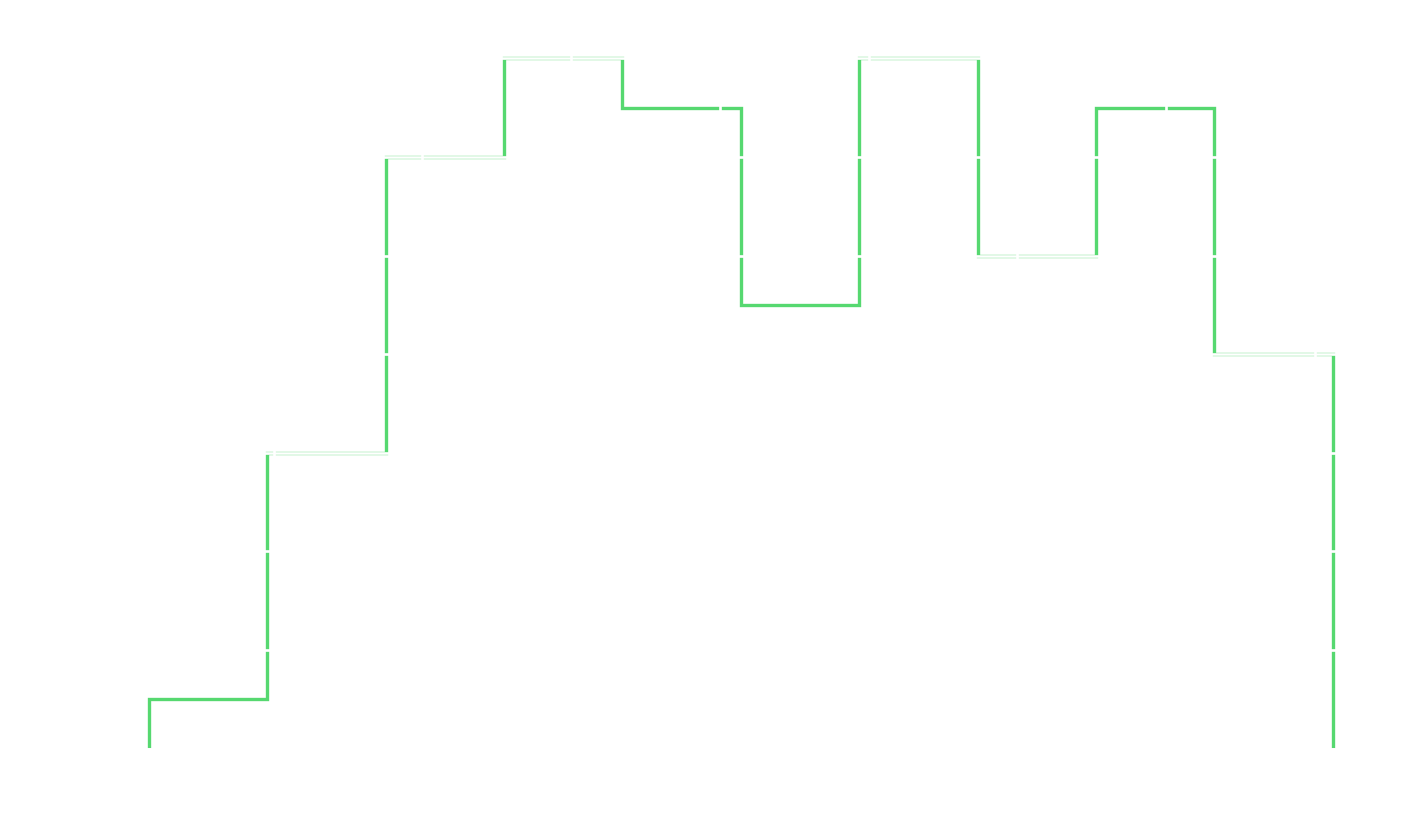

In [7]:
pop.grade.hist(histtype='step')

In [8]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [9]:
pop.sample(100, replace=True).describe()

,grade
count,100.000000
mean,5.636797
std,1.899318
min,1.983167
25%,4.204147
50%,5.799635
75%,7.213460
max,9.120705


In [10]:
bootstrap = pd.DataFrame({'meangrade': [pop.sample(100,replace=True).grade.mean() for i in range(1000)]})

In [11]:
print(bootstrap)

     meangrade
0     5.717750
1     5.283899
2     5.421733
3     5.726189
4     5.391072
..         ...
995   5.527247
996   5.484950
997   5.328473
998   5.842729
999   5.696289

[1000 rows x 1 columns]


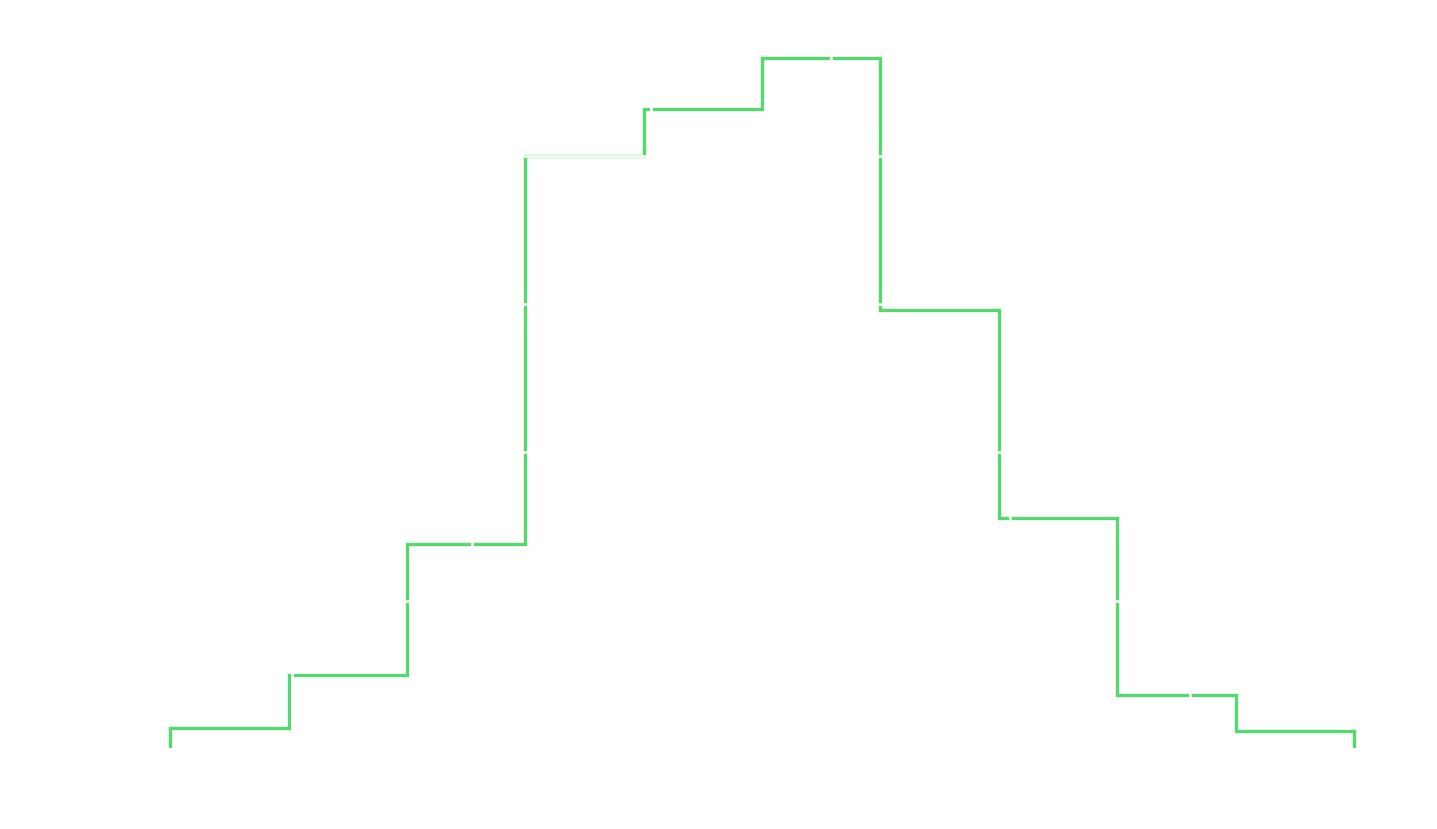

In [12]:
bootstrap.meangrade.hist(histtype='step')

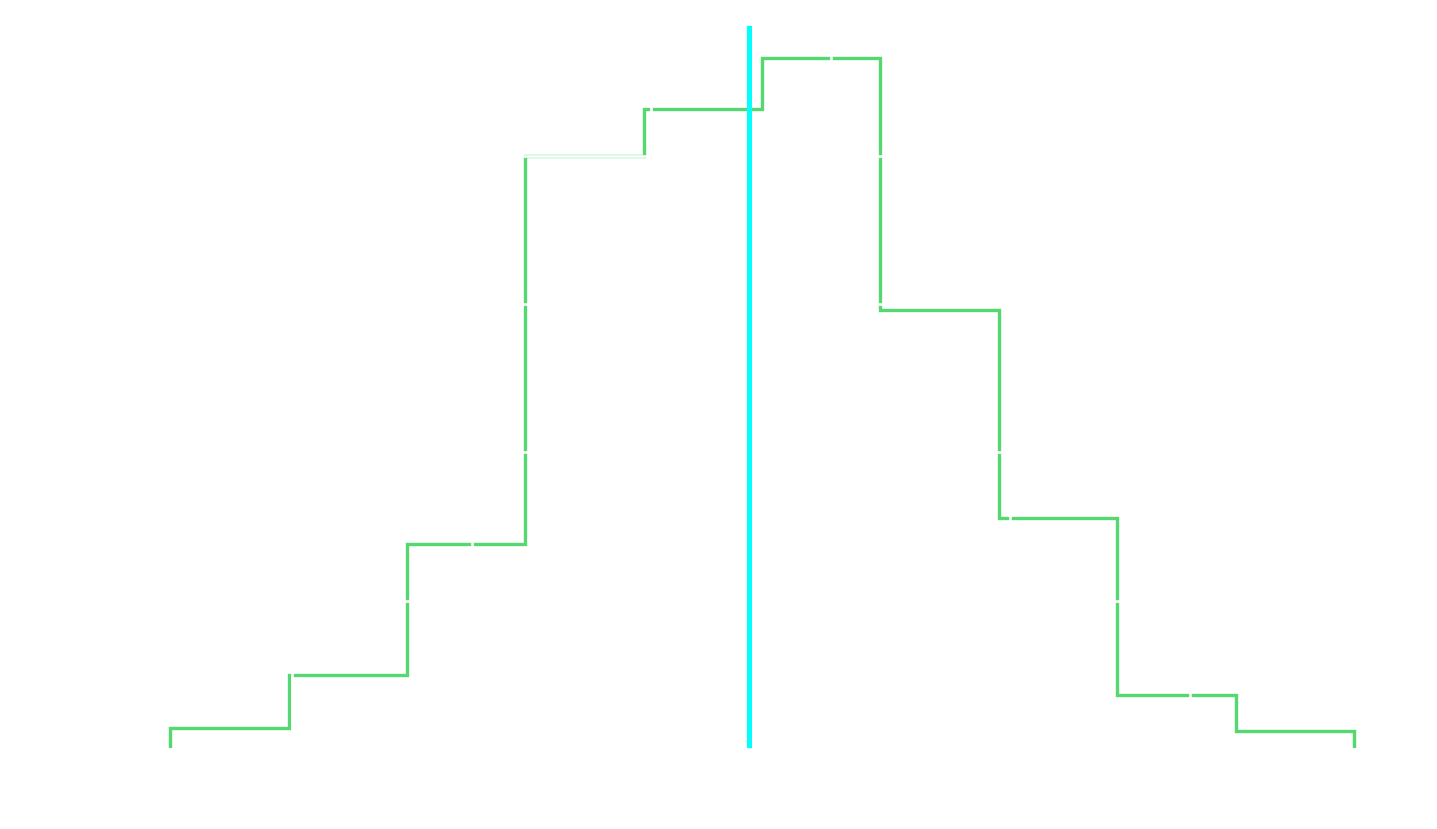

In [13]:
bootstrap.meangrade.hist(histtype='step')
pp.axvline(pop.grade.mean(), color='aqua')

In [14]:
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.105526550268309, 5.915285792284436)

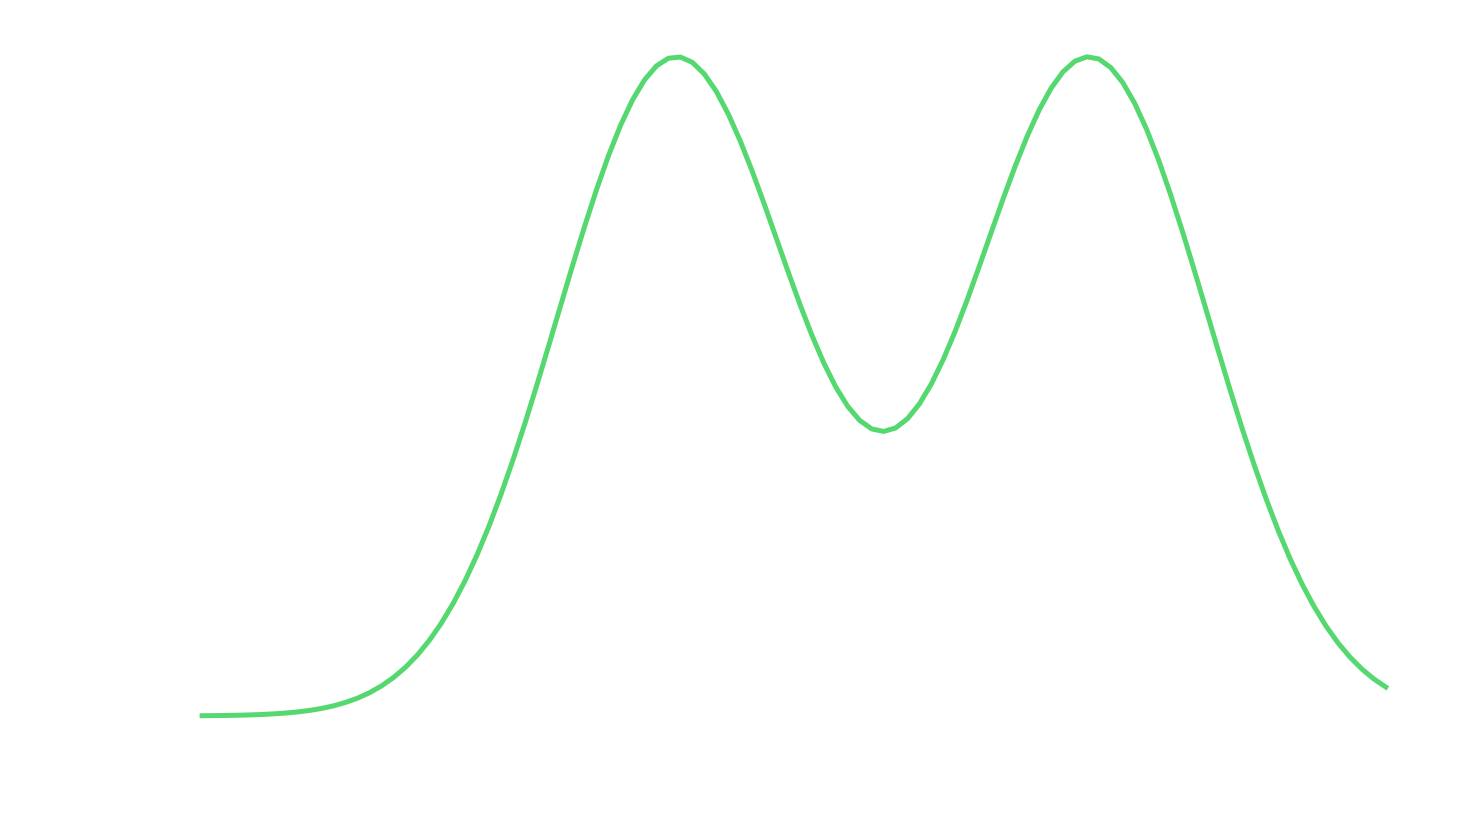

In [17]:
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x = np.linspace(0, 10, 100)
pp.plot(x, 0.5 * n1.pdf(x) + 0.5 * n2.pdf(x))

In [18]:
def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v

In [19]:
draw()

3.5693463147974214

In [22]:
def dataset(n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

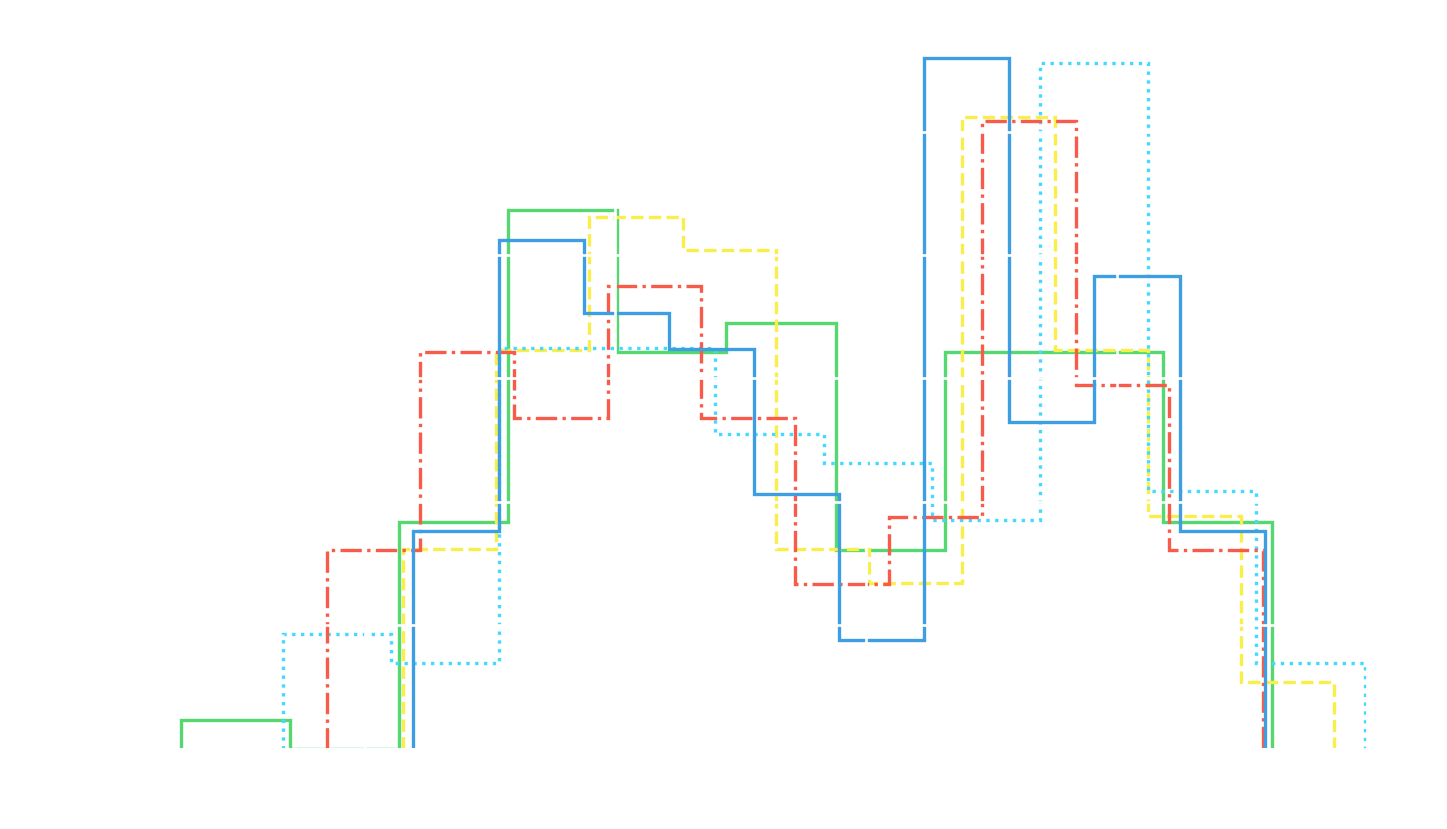

In [23]:
for i in range(5):
    dataset(100).grade.hist(histtype = 'step', density = True)

In [26]:
means = pd.DataFrame({'meangrade': [dataset(100).grade.mean() for i in range(1000)]})

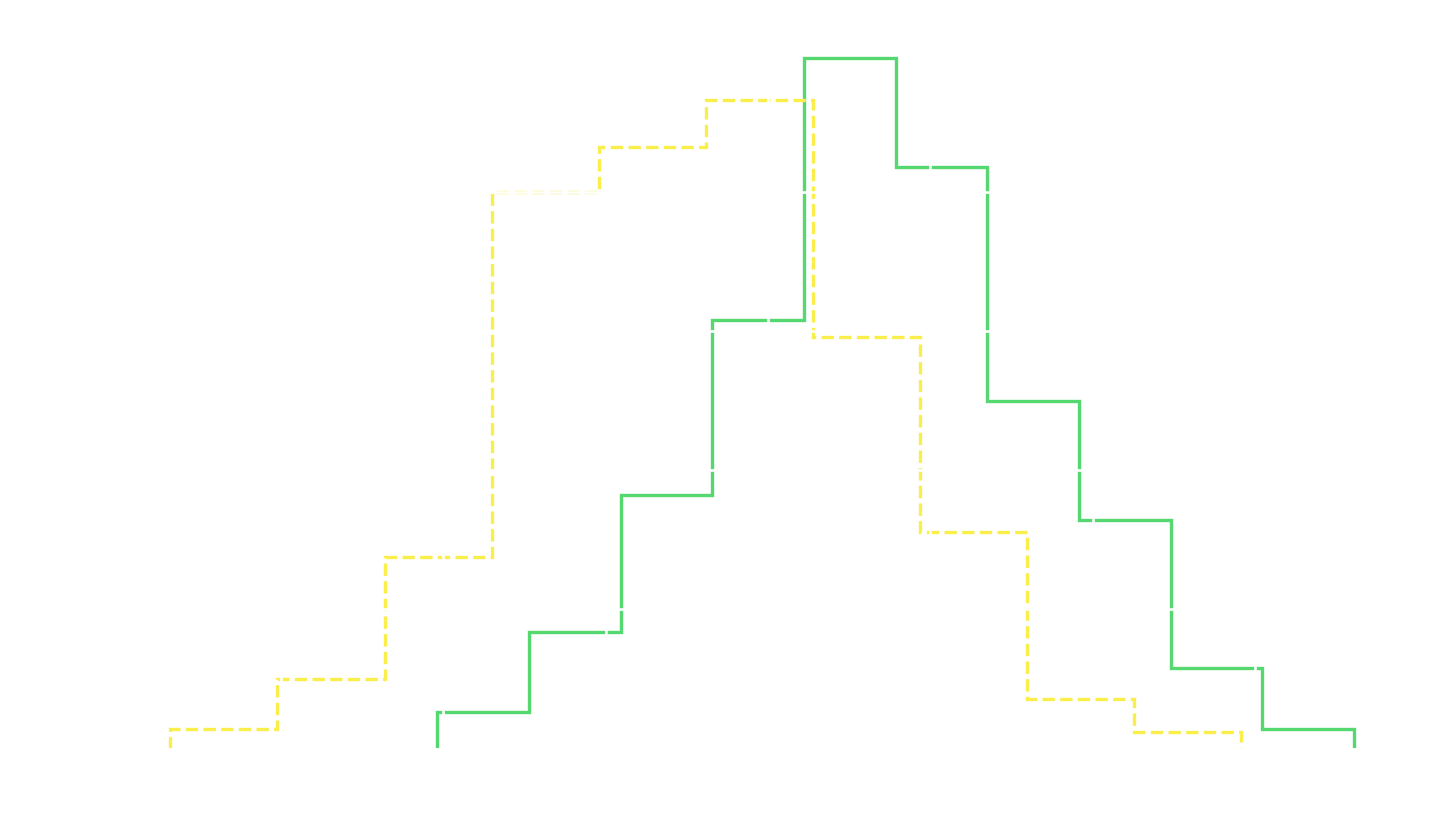

In [29]:
means.meangrade.hist(histtype = 'step')
bootstrap.meangrade.hist(histtype='step')